# Image classification with fast.ai
In this notebook you will learn how to make in a few lines of code a model that distinguises cats from dogs in pictures, using the [fast.ai](https://docs.fast.ai/) library.

To train a deep learning model, a GPU runtime is needed. With datalayer, you can switch your kernel to a remote kernel with GPU using the kernel picker.

## Disclaimer
This is widely based on the [fastbook](https://github.com/fastai/fastbook) created by [Jeremy Howard](https://github.com/jph00) and [Sylvain Grugger](https://github.com/sgugger). 


## Setup

In [1]:
!pip install fastai

In [2]:
# GPU check
!nvidia-smi

Wed Aug 21 13:05:35 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100S-PCIE-32GB          On  |   00000000:00:05.0 Off |                    0 |
| N/A   41C    P0             27W /  250W |       0MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Dataset

A dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection and will then be extracted.

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'  # downloads the data

def is_cat(x): return x[0].isupper()  # label function (if uppercase it is a cat, otherwise it is a dog)

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))  # data loader

We can then check if everything looks okay with the `show_batch` method (`True` is for cat, `False` is for dog):

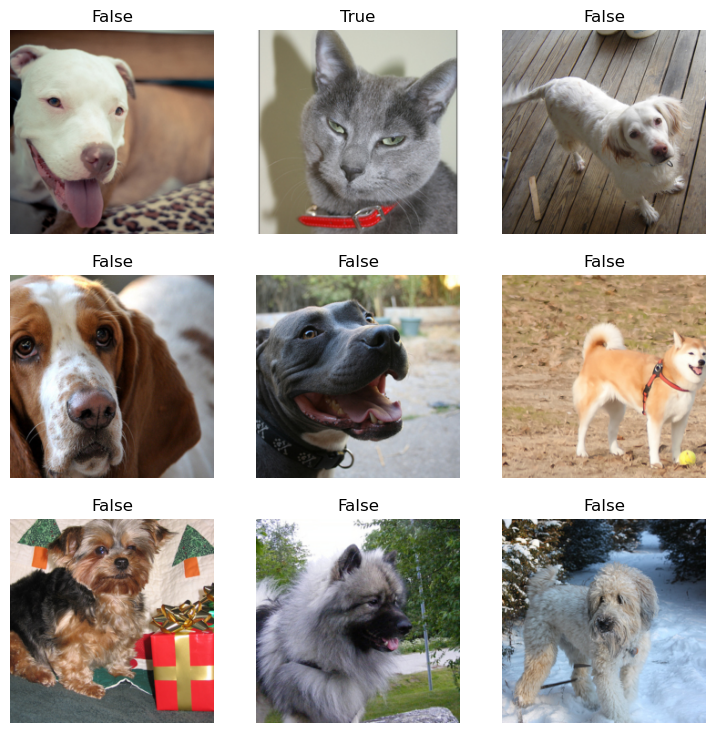

In [4]:
dls.show_batch()

## Model training

A *pretrained model* that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.

The pretrained model will be *fine-tuned* using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats. It will run two epochs, one only on 

The fine-tuning needs to be run on GPU.

/opt/conda/lib/python3.11/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 95.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.157539,0.026560,0.006089,00:33


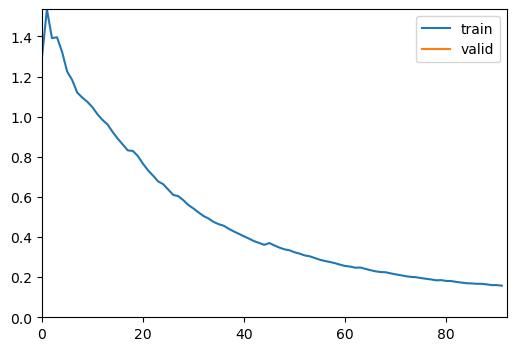

epoch,train_loss,valid_loss,error_rate,time
0,0.060443,0.029109,0.007442,00:30
1,0.030523,0.009741,0.004736,00:34


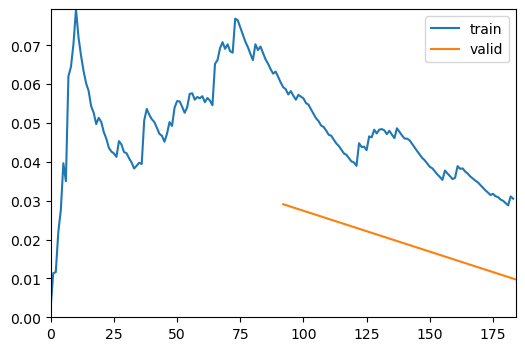

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, cbs=ShowGraphCallback())  # our CNN model
learn.fine_tune(2)  # training of the model

## Predict on new data

In [6]:
from IPython.display import Image, HTML, display

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8417  100  8417    0     0  29596      0 --:--:-- --:--:-- --:--:-- 29533
/tmp/cat.jpg


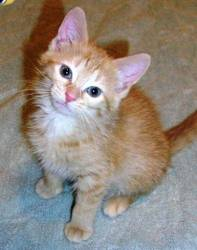

In [7]:
! curl https://raw.githubusercontent.com/fastai/fastbook/master/images/chapter1_cat_example.jpg -o /tmp/cat.jpg
! ls /tmp/cat.jpg
Image("/tmp/cat.jpg")

In [8]:
pred, _, probs = learn.predict("/tmp/cat.jpg")
display(HTML(f"<h1>Is this a cat?: {pred}.</h1>"))
print(f"Probability it's a cat: {probs[1].item():.6f}")

Probability it's a cat: 1.000000


## Saving our model

In [11]:
learn.export('export.pkl')